DECISION TREES

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import tree


In [3]:
# Load the dataset
data = pd.read_csv("cleaned_CKD_dataset.csv")

# Define features and target
X = data.drop("Class", axis=1)  # Drop the target column to get features
y = data["Class"]  # Use "Class" as the target column

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loaded and split into training and testing sets successfully.")


Data loaded and split into training and testing sets successfully.


Accuracy of the basic Decision Tree: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.96      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



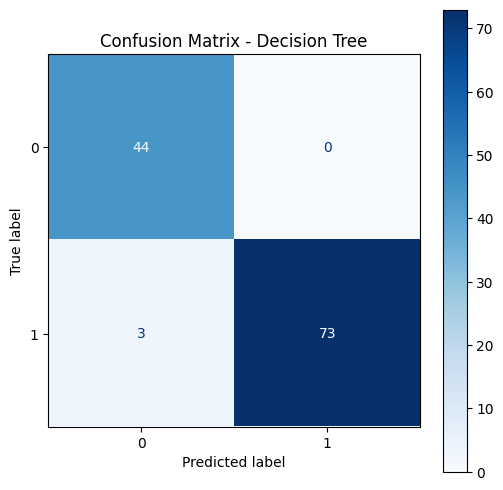

In [5]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the basic Decision Tree: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


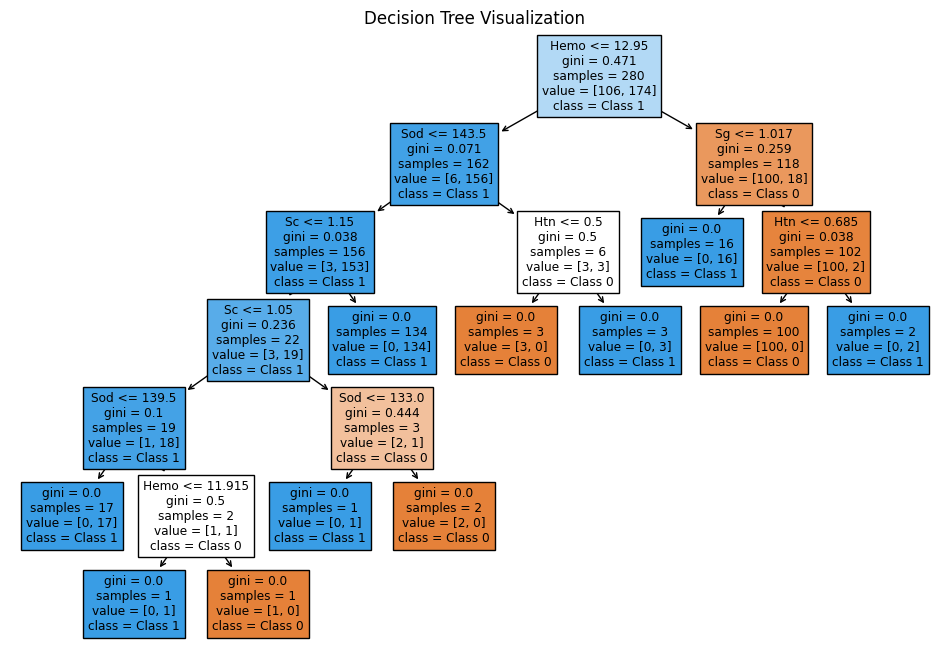

In [ ]:
# Visualize the tree structure
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and their accuracy
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")
#gpt prompt: how to perform grid search for best parameters?


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9571


In [ ]:
# Train Decision Tree with the best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Make predictions
y_pred_best = best_dt.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Parameters: {accuracy_best:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Accuracy with Best Parameters: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.96      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

Confusion Matrix:
[[44  0]
 [ 3 73]]


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 1.0000


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")


Gradient Boosting Accuracy: 0.9917


In [ ]:
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Optimized Decision Tree Accuracy: {accuracy_best:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")


Decision Tree Accuracy: 0.9750
Optimized Decision Tree Accuracy: 0.9750
Random Forest Accuracy: 1.0000
Gradient Boosting Accuracy: 0.9917


Train-Test Split 0.80/0.20 - Accuracy: 1.0000
Train-Test Split 0.70/0.30 - Accuracy: 0.9750
Train-Test Split 0.60/0.40 - Accuracy: 0.9875


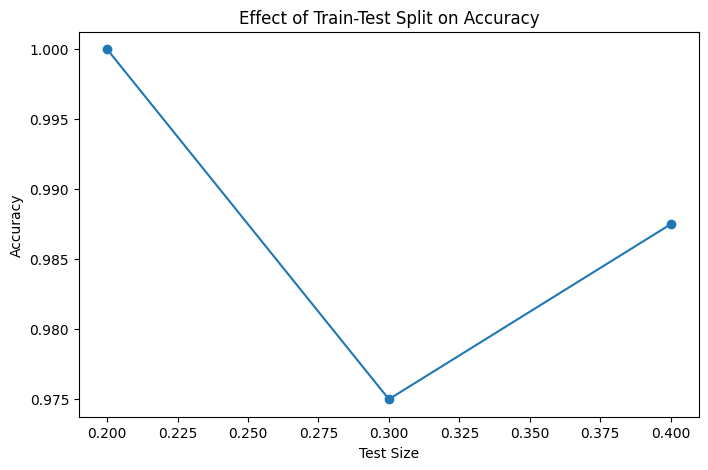

In [ ]:
# Test different train-test split ratios
split_ratios = [0.2, 0.3, 0.4]
results = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[ratio] = acc
    print(f"Train-Test Split {1-ratio:.2f}/{ratio:.2f} - Accuracy: {acc:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(split_ratios, list(results.values()), marker='o')
plt.title("Effect of Train-Test Split on Accuracy")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# Perform cross-validation to evaluate generalization
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Mean STD Accuracy: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.9875 1.     0.95   0.975  0.9875]
Mean CV Accuracy: 0.9800
Mean STD Accuracy: 0.0170


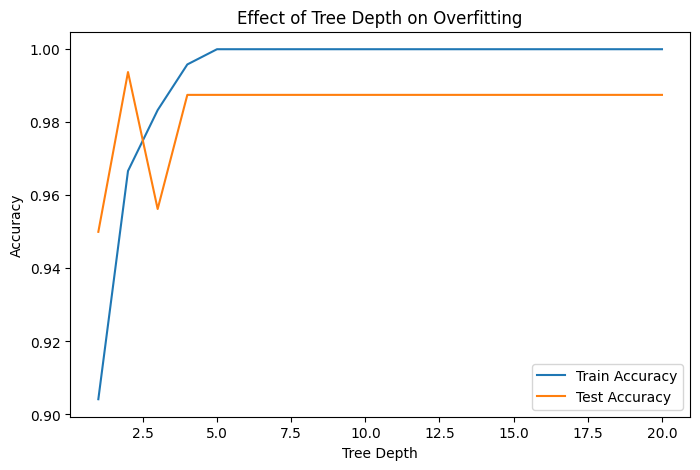

In [ ]:
# Test different max_depth values to investigate overfitting
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

# Plot train and test accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy")
plt.plot(depths, test_accuracies, label="Test Accuracy")
plt.title("Effect of Tree Depth on Overfitting")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


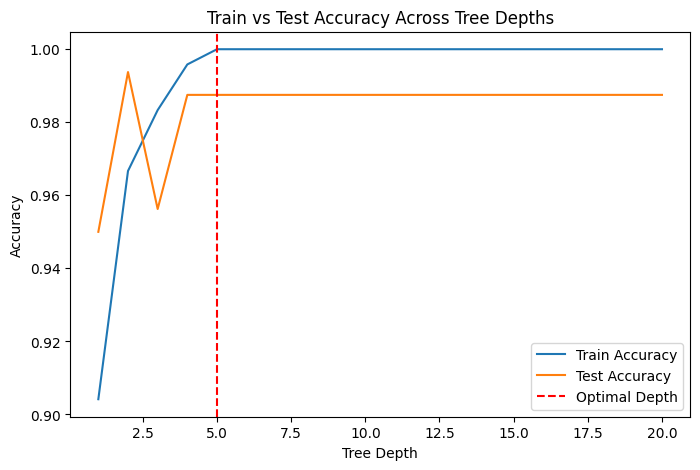

In [ ]:
import matplotlib.pyplot as plt

depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.axvline(x=5, color='r', linestyle='--', label='Optimal Depth')
plt.title('Train vs Test Accuracy Across Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree with optimal depth
dt_optimal = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_optimal.fit(X_train, y_train)

# Evaluate the model
y_train_pred = dt_optimal.predict(X_train)
y_test_pred = dt_optimal.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy (Optimal Depth): {train_accuracy:.4f}")
print(f"Test Accuracy (Optimal Depth): {test_accuracy:.4f}")


Train Accuracy (Optimal Depth): 1.0000
Test Accuracy (Optimal Depth): 0.9875


In [ ]:
# Further regularized decision tree
dt_more_regularized = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_more_regularized.fit(X_train, y_train)

# Evaluate the model
y_train_pred = dt_more_regularized.predict(X_train)
y_test_pred = dt_more_regularized.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy (More Regularized): {train_accuracy:.4f}")
print(f"Test Accuracy (More Regularized): {test_accuracy:.4f}")
#gpt prompt:regularize the decision tree further

Train Accuracy (More Regularized): 0.9750
Test Accuracy (More Regularized): 0.9583


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(
    dt_more_regularized,  # Regularized Decision Tree
    X_train,              # Training Features
    y_train,              # Training Labels
    cv=5,                 # Number of folds
    scoring='accuracy'    # Metric
)

# Print Cross-Validation Results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.97916667 0.97916667 0.89583333 0.9375     0.89583333]
Mean CV Accuracy: 0.9375
Standard Deviation of CV Scores: 0.0373


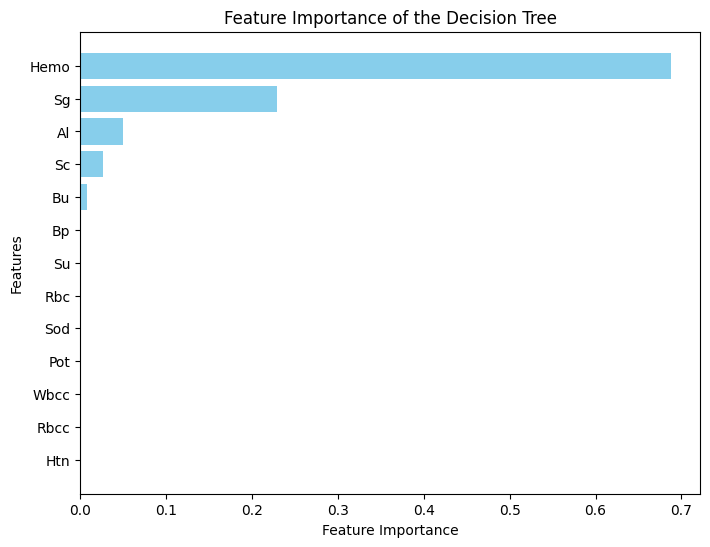

   Feature  Importance
9     Hemo    0.687458
1       Sg    0.228636
2       Al    0.049320
6       Sc    0.027114
5       Bu    0.007472
0       Bp    0.000000
3       Su    0.000000
4      Rbc    0.000000
7      Sod    0.000000
8      Pot    0.000000
10    Wbcc    0.000000
11    Rbcc    0.000000
12     Htn    0.000000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = dt_more_regularized.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of the Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Print feature importances for reference
print(feature_df)
